## Sentiment Analysis in Posts


### Challenge part 1 - JC Quillet

The object of this notebook is the classification of post written in the Dutch language according to the sentiment expressed by the author.  

### Data Exploration and Visualization


In [490]:
import json
import pandas as pd
import numpy as np
from IPython.display import display, HTML
from os import listdir

In [491]:
'''Load the dataset
'''
filenames = sorted(listdir('dutch_data')) # List of filenames in the folder containing the dataset

raw_data = []
for i in range(len(filenames)):
    with open('dutch_data/'+filenames[i]) as f:
      raw_data += json.load(f)

print(raw_data[1])
print('Total of {} posts in the dataset'.format(len(raw_data)))

{'emotion': '', 'other': '', 'source_url': 'http://www.youtube.com/', 'batch_name': 'Seeds_DUTCH_1-1', 'author_gender': '', 'who_curated': 'Brechtje', 'language': 'Dutch', 'categories': '', 'sentiment': 'neutral', 'url': 'https://www.youtube.com/watch?v=2FYB25e0_4E', 'posted_at': 'Wed Sep 21 17:53:52 2016', 'source': 'youtube', 'source_type': 'video', 'author_location': '', 'relevance_2': 'yes', 'author_username': 'Pphvideo', 'topics': '', 'brands': '', 'content': 'Een dorsmachine wordt gebruikt voor het dorsen - ofwel oogsten van graan, rogge of gerst. Voor de opkomst van zelfrijdende dorsers werd gebruik gemaakt van machines aangedreven door een tractor.', 'author_avatar_url': '', 'noise': '', 'author_url': 'http://youtube.com/channel/UCtVRhmseKQa2DcQnMlbwzQQ', 'source_domain': 'www.youtube.com', 'id': '3054dced040ee03753c98ccc77e1638f3db9bbe8', 'author_name': ' '}
Total of 18000 posts in the dataset


In [492]:
# Store the data in a dataframe and output categories
data = pd.DataFrame(raw_data)
data = data[['sentiment','content']]
print('Sentiments: {}'.format(data.sentiment.unique())) # Sentiment categories

Sentiments: ['' 'neutral' 'positive' 'negative' 'not sure' nan]


The dataset contains a lot of information that is not relevant for the sentiment analysis, as URLs or author names.   
Some samples will not be useful, as the sentiment is unknown.

In [493]:
# Remove unecessary data
data = data[data.sentiment != '']
data = data[data.sentiment != 'not sure']
data = data.dropna()

print('Total of {} samples that can be used directly for sentiment analysis'.format(data.shape[0]))
print('{} positive, {} negative and {} neutral'.format(data[data.sentiment == 'positive'].shape[0],
                                                      data[data.sentiment == 'negative'].shape[0],
                                                       data[data.sentiment == 'neutral'].shape[0]))

Total of 3166 samples that can be used directly for sentiment analysis
759 positive, 179 negative and 2228 neutral


In [494]:
''' Clean text data, by removing unecessary characters,
    numbers, urls, that do not add information for sentiment
    analysis.
'''
import re

removeChar = re.compile("[.;:!\'’‘?,\"()\[\]#@%|_–-]")
replaceAmpersand = re.compile("&")
replaceDigits = re.compile('\d+')
removeUrls = re.compile(r'http\S+')
removeMentions = re.compile(r'@[A-Za-z0-9]+')

def preprocess_reviews(reviews):
    reviews = reviews.lower()
    reviews = re.sub(removeUrls, "", reviews)
    reviews = re.sub(removeMentions, "", reviews)
    reviews = re.sub(removeChar, "", reviews)
    reviews = re.sub(replaceAmpersand, "en", reviews)
    reviews = re.sub(replaceDigits, "", reviews)
    
    return str(reviews)

data['content'] = data['content'].apply(lambda x : preprocess_reviews(x))

# Display part of the data corrected
def display_pd(some_df):
    display(HTML(some_df.to_html()))
    
display_pd(data.head(5))

,sentiment,content
1,neutral,een dorsmachine wordt gebruikt voor het dorsen...
2,neutral,de plant groeit vanuit een flinke boleerst ont...
6,neutral,als de temperatuur boven het vriespunt komt ku...
7,neutral,wie zijn er nog meer aanwezig lowieke van riv...
8,neutral,tot slot nog een vooraanzicht van de hele kaps...


In [495]:
# Concatenate the text for positive posts
pos_data = data[data.sentiment == 'positive']

positive_text = ''
for i in range(pos_data.shape[0]):
    positive_text = positive_text + pos_data.iloc[i]['content']

Example of words ['een', 'dorsmachine', 'wordt', 'gebruikt', 'voor', 'het', 'dorsen', 'ofwel', 'oogsten', 'van', 'graan', 'rogge', 'of', 'gerst', 'voor', 'de', 'opkomst', 'van', 'zelfrijdende', 'dorsers']


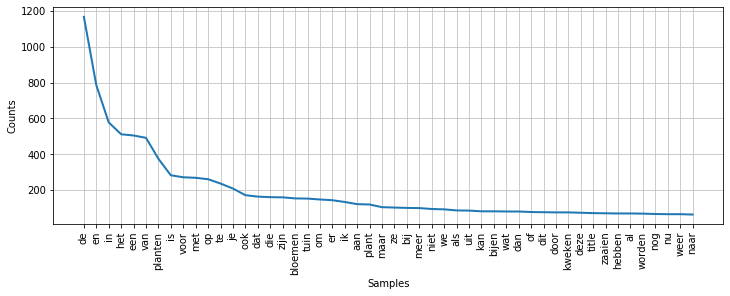

Top words: [('met', 269), ('een', 505), ('tuin', 153), ('je', 209), ('te', 237), ('in', 578), ('de', 1167), ('van', 492), ('voor', 272), ('planten', 375), ('op', 261), ('bloemen', 154), ('die', 161), ('het', 512), ('en', 786), ('is', 283), ('zijn', 160), ('ook', 172), ('dat', 164)]


In [502]:
# Tokenize the text and do a word frequency count for positive words
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

pos_words = word_tokenize(positive_text)
print('Example of words {}'.format(words[:20]))

freq_dist = nltk.FreqDist(pos_words)
freq_dist.plot(50)

top_words = list(filter(lambda x: x[1]>=150,freq_dist.items()))
print('Top words: {}'.format(top_words))

In [503]:
# Concatenate the text for negative posts
neg_data = data[data.sentiment == 'negative']

negative_text = ''
for i in range(neg_data.shape[0]):
    negative_text = negative_text + neg_data.iloc[i]['content']

Example of words ['een', 'dorsmachine', 'wordt', 'gebruikt', 'voor', 'het', 'dorsen', 'ofwel', 'oogsten', 'van', 'graan', 'rogge', 'of', 'gerst', 'voor', 'de', 'opkomst', 'van', 'zelfrijdende', 'dorsers']


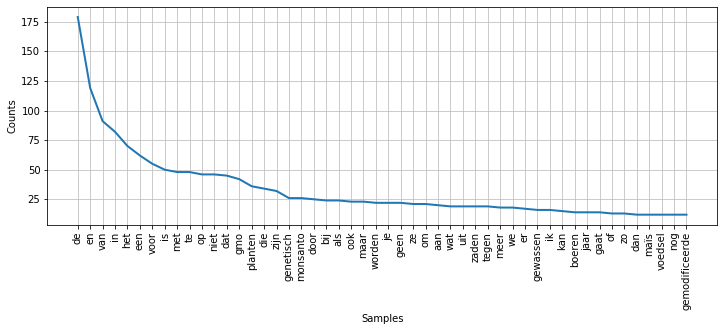

Top words: [('is', 50), ('van', 91), ('de', 179), ('voor', 55), ('en', 119), ('het', 70), ('zijn', 32), ('op', 46), ('worden', 22), ('bij', 24), ('planten', 36), ('ook', 23), ('met', 48), ('die', 34), ('niet', 46), ('door', 25), ('als', 24), ('je', 22), ('een', 62), ('geen', 22), ('dat', 45), ('maar', 23), ('in', 82), ('te', 48), ('genetisch', 26), ('monsanto', 26), ('gmo', 42)]


In [515]:
# Tokenize the text and do a word frequency count for negative words
plt.figure(figsize=(12, 4))

neg_words = word_tokenize(negative_text)
print('Example of words {}'.format(words[:20]))

freq_dist = nltk.FreqDist(neg_words)
freq_dist.plot(50)

top_words = list(filter(lambda x: x[1]>=22,freq_dist.items()))
print('Top words: {}'.format(top_words))

In [507]:
# Concatenate the text for neutral posts
neu_data = data[data.sentiment == 'neutral']

neutral_text = ''
for i in range(neu_data.shape[0]):
    neutral_text = neutral_text + neu_data.iloc[i]['content']

Example of words ['een', 'dorsmachine', 'wordt', 'gebruikt', 'voor', 'het', 'dorsen', 'ofwel', 'oogsten', 'van', 'graan', 'rogge', 'of', 'gerst', 'voor', 'de', 'opkomst', 'van', 'zelfrijdende', 'dorsers']


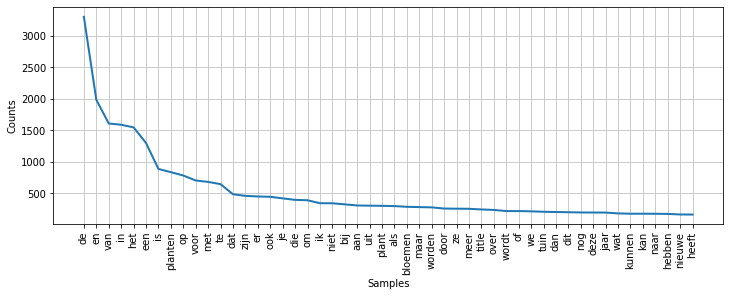

Top words: [('een', 1302), ('voor', 706), ('het', 1549), ('van', 1611), ('de', 3304), ('in', 1591), ('met', 683), ('en', 1988), ('er', 452), ('is', 889), ('ook', 447), ('op', 785), ('zijn', 462), ('dat', 487), ('planten', 838), ('te', 648), ('je', 422)]


In [516]:
# Tokenize the text and do a word frequency count for neutral posts words
plt.figure(figsize=(12, 4))

neut_words = word_tokenize(neutral_text)
print('Example of words {}'.format(words[:20]))

freq_dist = nltk.FreqDist(neut_words)
freq_dist.plot(50)

top_words = list(filter(lambda x: x[1]>=400,freq_dist.items()))
print('Top words: {}'.format(top_words))

In [513]:
# Remove stopwords from text corpus
from nltk.corpus import stopwords
pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('dutch')) + r')\b\s*')

def stopwords_reviews(reviews):
    reviews = re.sub(pattern, "", reviews)
    
    return str(reviews)

stopwords_data = data.copy(deep = True)
stopwords_data['content'] = stopwords_data['content'].apply(lambda x : stopwords_reviews(x))

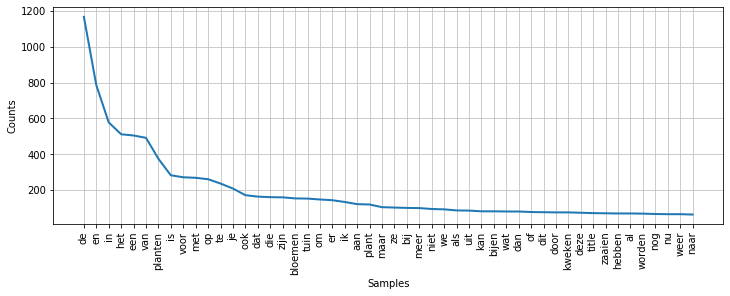

Top words: [('met', 269), ('een', 505), ('als', 87), ('tuin', 153), ('je', 209), ('om', 148), ('te', 237), ('in', 578), ('de', 1167), ('deze', 74), ('van', 492), ('voor', 272), ('planten', 375), ('op', 261), ('of', 78), ('bloemen', 154), ('die', 161), ('het', 512), ('uit', 86), ('en', 786), ('ze', 103), ('door', 76), ('naar', 64), ('kunnen', 57), ('is', 283), ('ik', 134), ('er', 144), ('jaar', 63), ('nog', 67), ('maar', 105), ('zijn', 160), ('aan', 122), ('plant', 120), ('wordt', 53), ('hebben', 70), ('over', 62), ('groenten', 51), ('ook', 172), ('zo', 57), ('title', 72), ('dat', 164), ('wat', 81), ('bij', 101), ('dan', 81), ('worden', 69), ('meer', 100), ('kan', 82), ('al', 70), ('bomen', 51), ('we', 93), ('niet', 95), ('kweken', 76), ('eigen', 54), ('zaaien', 71), ('bijen', 82), ('dit', 77), ('nu', 66), ('weer', 66), ('rt', 61)]


In [517]:
# Positive words without stop words
plt.figure(figsize=(12, 4))

freq_dist = nltk.FreqDist(pos_words)
freq_dist.plot(50)

top_words = list(filter(lambda x: x[1]>=50,freq_dist.items()))
print('Top words: {}'.format(top_words))

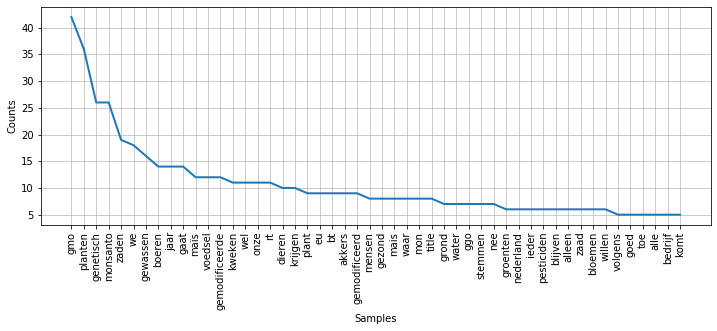

Top words: [('kweken', 11), ('planten', 36), ('wel', 11), ('boeren', 14), ('gewassen', 16), ('jaar', 14), ('dieren', 10), ('krijgen', 10), ('zaden', 19), ('genetisch', 26), ('maïs', 12), ('monsanto', 26), ('voedsel', 12), ('gmo', 42), ('onze', 11), ('we', 18), ('gemodificeerde', 12), ('gaat', 14), ('rt', 11)]


In [519]:
# Negative words without stop words
neg_words = [w for w in ne_words if not w in stop_words]
plt.figure(figsize=(12, 4))

freq_dist = nltk.FreqDist(neg_words)

freq_dist.plot(50)

top_words = list(filter(lambda x: x[1]>=10,freq_dist.items()))
print('Top words: {}'.format(top_words))

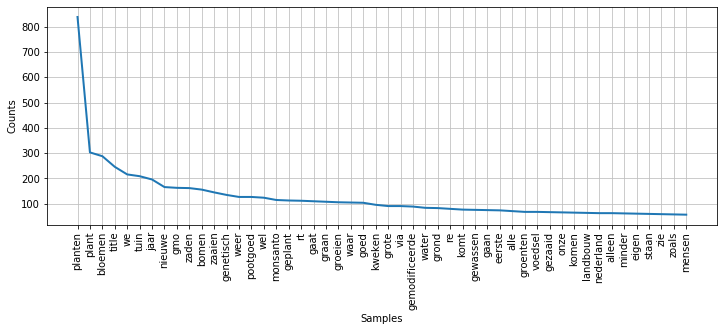

Top words: [('plant', 303), ('bloemen', 288), ('weer', 127), ('zaden', 162), ('tuin', 209), ('planten', 838), ('monsanto', 115), ('pootgoed', 127), ('wel', 124), ('we', 216), ('title', 246), ('jaar', 196), ('gaat', 110), ('geplant', 113), ('nieuwe', 166), ('bomen', 156), ('zaaien', 145), ('rt', 112), ('gmo', 163), ('genetisch', 135)]


In [521]:
# Neutral words without stop words
neut_words = [w for w in neut_words if not w in stop_words]
plt.figure(figsize=(12, 4))

freq_dist = nltk.FreqDist(neut_words)

freq_dist.plot(50)

top_words = list(filter(lambda x: x[1]>=110,freq_dist.items()))
print('Top words: {}'.format(top_words))

## Conclusion   

Some observations can be done on this dataset:
- The geneal topic seems to be about agriculture/gardening, as some words like "plante" or "planten" are among the most frequent in all categories, while "Bloemen" is one of the most frequent in the positive side, and flowers are a big part of the Dutch agriculture.
- For words that are present in all categories, there are solutions to account for their lack of representativity when vectorizing the dataset, like TF-IDF,
- There are far more neutral posts than positive or negative, the negative posts being the least numerous, so the dataset is very imbalanced,
- Stopwords have naturally a high frequency in the dataset. We can consider trying to remove them when training our model to evaluate if it help. This is not necessarily the case.